In [1]:
VIDEO_LENGTH_FILE = r'../data/video_length.csv'
TRACK_LENGTH_FILE = r'../data/track_length.csv'

In [2]:
%matplotlib inline
from datetime import timedelta
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load video data
video_data_src = Path(VIDEO_LENGTH_FILE)
track_data_src = Path(TRACK_LENGTH_FILE)

video_data_columns = {'video_length': float, 'time_detecting': float, 'width': int, 'height': int, 'fps': int}
track_data_columns = {'track_length': float, 'width': int, 'height': int, 'fps': int}

video_df = pd.read_csv(video_data_src, index_col=0, dtype=video_data_columns)
track_df = pd.read_csv(track_data_src, index_col=0, dtype=track_data_columns)

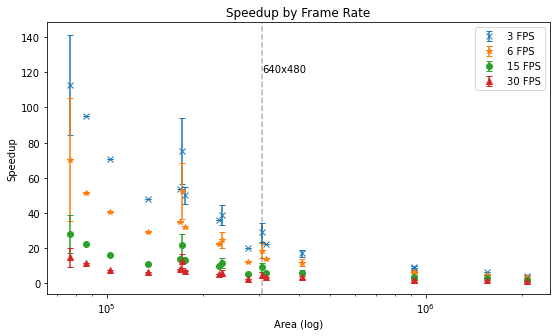

In [4]:
video_df['area'] = video_df['width'] * video_df['height']
video_df['speedup'] = video_df['video_length'] / video_df['time_detecting']

speedup_df = video_df.groupby(['area', 'fps']).agg([np.mean, np.std]).reset_index(level='area')

# Speedup as affected by area and frame rate.
# The vertical line is the selected threshold resolution that covers 75% of the dataset

fig = plt.figure(figsize=(9, 5))
ax = plt.axes()
markers='x*o^'

for marker, (key, group) in zip(markers, speedup_df.groupby('fps')):
    yerr = group[('speedup', 'std')].fillna(0)
    ax.errorbar(group['area'], group[('speedup', 'mean')], yerr=yerr, capsize=3, fmt=marker, label=f'{key} FPS')

# ax.set_yscale('log')
ax.set_xscale('log')
    
# 640 x 480
plt.axvline(x=640*480, color='#0f0f0f50', linestyle='--')
plt.text(640*480, 120, "640x480")
    
# fig.tight_layout()
plt.title('Speedup by Frame Rate')
plt.xlabel('Area (log)')
plt.ylabel('Speedup')
plt.legend()
plt.savefig('images/speedup_by_frame_rate.svg')
plt.savefig('images/speedup_by_frame_rate.png', bbox_inches='tight')
plt.show()

**Figure \[speedup_by_frame_rate]:** Asdf

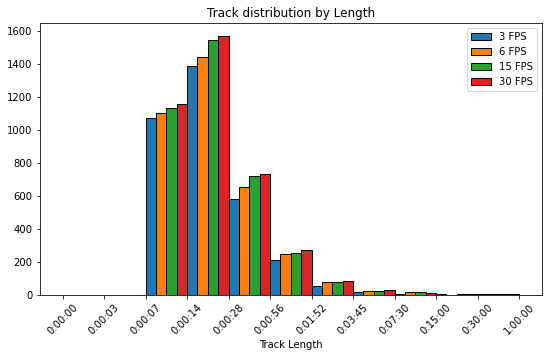

In [5]:
bins = np.power(2, np.arange(10, 0, -1))
bins = 3600 * (1 - np.concatenate([[1], (bins - 1) / bins, [0]]))

number_of_fps = len(pd.unique(track_df['fps']))
positions = np.arange(len(bins))
widths = 1.0 / number_of_fps

fig = plt.figure(figsize=(9, 5))
ax = plt.axes()

for i, (key, group) in enumerate(track_df.groupby('fps')):
    height, _ = np.histogram(group['track_length'].values, bins=bins)
    ax.bar(positions[:-1] + i * widths, height, width=widths, edgecolor='black', align='edge', label=f'{key} FPS')

plt.legend()
#plt.yscale('log')
plt.xticks(positions, [str(timedelta(seconds=s))[:7] for s in bins], rotation=45)
plt.title('Track distribution by Length')
plt.xlabel('Track Length')
plt.savefig('images/track_dist_length.svg')
plt.savefig('images/track_dist_length.png', bbox_inches='tight')
plt.show()

**Figure \[track_dist_length]:** Asdf

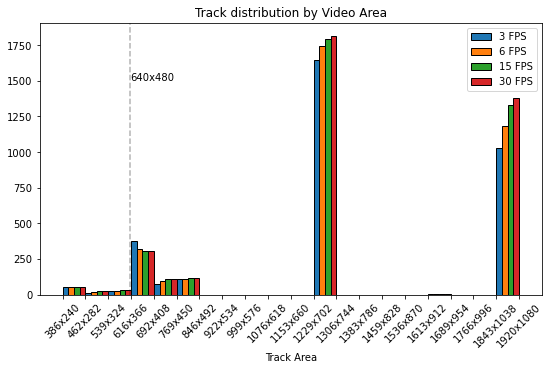

In [11]:
track_df['area'] = track_df['width'] * track_df['height']

# bins = np.linspace(track_df['area'].min(), track_df['area'].max(), 21, endpoint=True)

xedges = np.linspace(386, 1920, 21, endpoint=True)
yedges = np.linspace(240, 1080, 21, endpoint=True)
bins = xedges * yedges

number_of_fps = len(pd.unique(track_df['fps']))
positions = np.arange(len(bins))
widths = 1.0 / number_of_fps


#fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(9, 10), constrained_layout=True, squeeze=False)
#axs = axs.flatten()
fig = plt.figure(figsize=(9, 5))
ax = plt.axes()

for i, (key, group) in enumerate(track_df.groupby('fps')):
    height, _ = np.histogram(group['area'].values, bins=bins)
    ax.bar(positions[:-1] + i * widths, height, width=widths, edgecolor='black', align='edge', label=f'{key} FPS')
    
pos = (640 * 480) * positions[-1] / bins[-1]
    
# 640 x 480
plt.axvline(x=pos, color='#0f0f0f50', linestyle='--')
plt.text(pos, 1500, "640x480")
    
plt.legend()
# plt.yscale('log')
plt.xticks(positions, [f'{x}x{y}' for x, y in zip(xedges.astype(int), yedges.astype(int))], rotation=45)
plt.title('Track distribution by Video Area')
plt.xlabel('Track Area')
plt.savefig('images/track_dist_video_area.svg')
plt.savefig('images/track_dist_video_area.png', bbox_inches='tight')
plt.show()

**Figure \[track_dist_video_area]:** Asdf